In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import ensemble
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
from zipfile import ZipFile
zipfile=ZipFile('Downloads/newarchive.zip')
zipfile.extractall()

In [3]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape
#df.isnull().sum()

(284807, 31)

In [5]:
fraud=df[df['Class']==1]
safe=df[df['Class']==0]

Text(0.5, 1.0, 'transacted Amount')

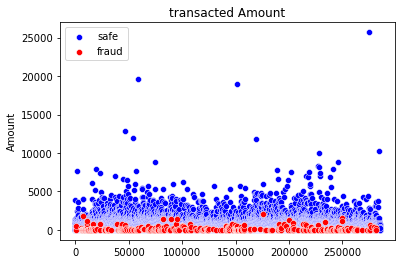

In [6]:
sns.scatterplot(data=safe['Amount'],color='blue')
sns.scatterplot(data=fraud['Amount'],color='red')
plt.legend(['safe','fraud'])
plt.title('transacted Amount')

Text(0.5, 1.0, 'Transacted Amount')

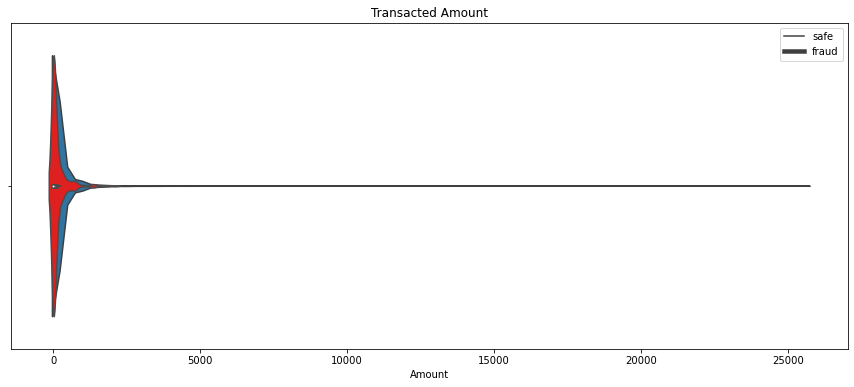

In [7]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,6))
sns.violinplot(safe.Amount)
sns.violinplot(fraud.Amount,color='red')
plt.legend(['safe','fraud'])
plt.title('Transacted Amount')

Text(0.5, 1.0, 'Heatmap for Fraud Transaction')

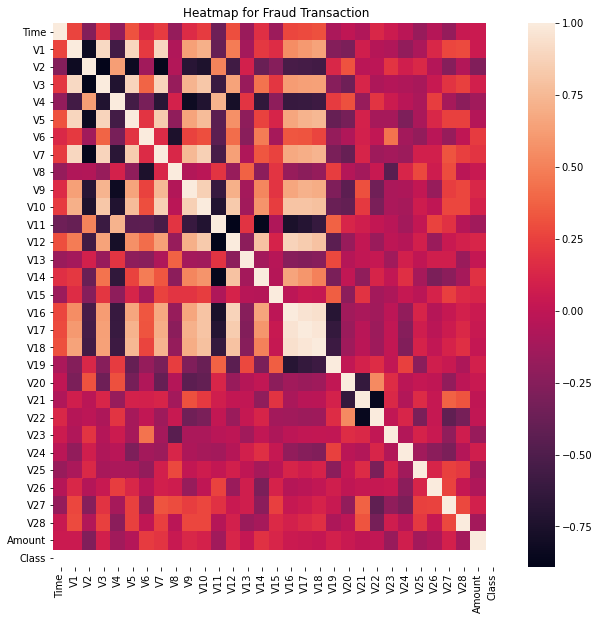

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(fraud.corr())
plt.title('Heatmap for Fraud Transaction')

Text(0.5, 1.0, 'Heatmap for Safe transaction')

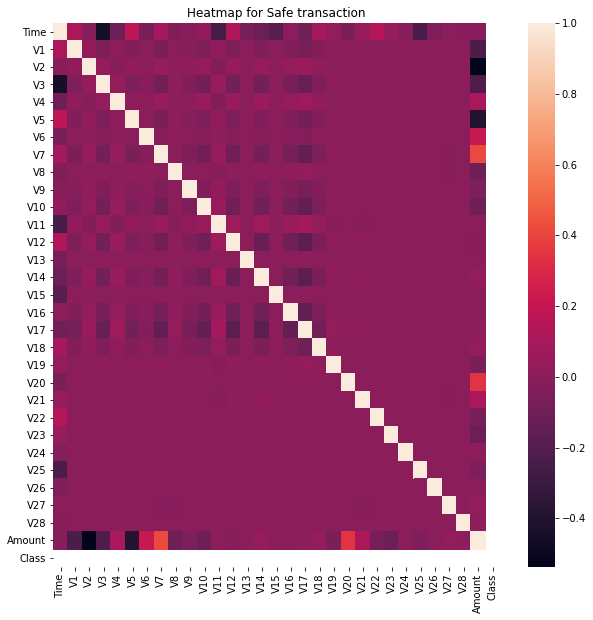

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(safe.corr())
plt.title('Heatmap for Safe transaction')

In [10]:
#we can see the chg in heatmap in fraud data and safe data

In [11]:
x=df.drop('Class',axis=1)
y=df['Class']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

#### LOGISTIC REGRESSION

In [13]:
lr=linear_model.LogisticRegression()

In [14]:
lr.fit(x_train,y_train)

LogisticRegression()

In [15]:
yhat=lr.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85286
           1       0.73      0.68      0.71       157

    accuracy                           1.00     85443
   macro avg       0.87      0.84      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [16]:
threshold=0.5

predicted_proba = lr.predict_proba(x_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

In [17]:
from sklearn.metrics import roc_auc_score
roc_auc_score(predicted,y_test)

0.840535688760082

In [18]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(predicted,y_test)

0.9989583699074237

In [19]:
print(classification_report(predicted,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85286
           1       0.73      0.68      0.71       157

    accuracy                           1.00     85443
   macro avg       0.87      0.84      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [20]:
from sklearn.metrics import roc_curve

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, predicted)

Text(0, 0.5, 'True Positive Rate')

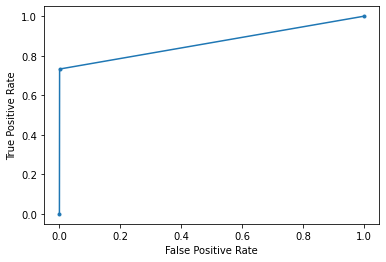

In [22]:
plt.plot(fpr,tpr,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [23]:
from sklearn.metrics import precision_recall_curve
precision,recall,_ = precision_recall_curve(y_test, lr.predict_proba(x_test)[:,1])

Text(0, 0.5, 'precision')

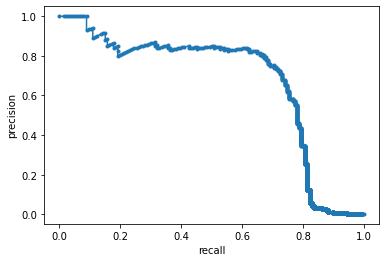

In [24]:
plt.plot(recall,precision,marker='.')
plt.xlabel('recall')
plt.ylabel('precision')

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

<AxesSubplot:xlabel='Class', ylabel='count'>

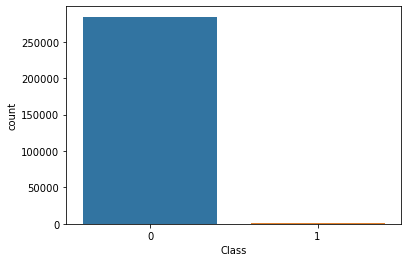

In [26]:
sns.countplot(df['Class'])

##### SMOTE

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
smote=SMOTE(random_state=60)
x_smote,y_smote=smote.fit_resample(x,y)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=1)

In [30]:
from sklearn.linear_model import LogisticRegression

###### LOGISTIC REGRESSION ON BALANCED DATA

In [31]:
lr=make_pipeline(StandardScaler(),LogisticRegression())
lr.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [32]:
yhat=lr.predict(x_test)

In [33]:
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     58110
           1       0.97      0.99      0.98     55616

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



In [34]:
roc_auc_score(yhat,y_test)

0.9807160218561916

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yhat,y_test)

array([[56409,  1701],
       [  517, 55099]], dtype=int64)

###### RANDOM FOREST CLASSIFIER ON BALANCED DATA

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf=make_pipeline(StandardScaler(),RandomForestClassifier())
rf.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [38]:
yhat=rf.predict(x_test)

In [39]:
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56918
           1       1.00      1.00      1.00     56808

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [40]:
confusion_matrix(yhat,y_test)

array([[56917,     1],
       [    9, 56799]], dtype=int64)

Text(0.5, 1.0, 'roc curve of RFC model using Balanced Data')

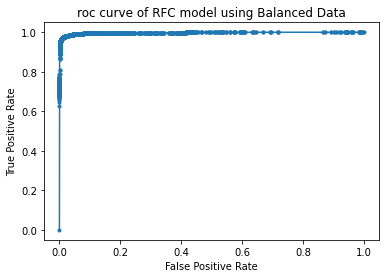

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc curve of RFC model using Balanced Data')

Text(0.5, 1.0, 'precision recall curve of RFC model using Balanced Data')

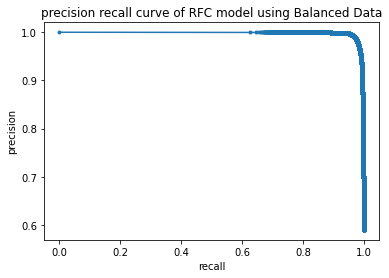

In [42]:
precision,recall,_ = precision_recall_curve(y_test, lr.predict_proba(x_test)[:,1])
plt.plot(recall,precision,marker='.')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve of RFC model using Balanced Data')